# Transformacja Boxa-Coxa

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Jeśli dane znacznie różnią się od rozkładu normalnego, czasami można dokonać transformacji danych tak by przypominały rozkład normalny. 

Na przykład dane często zawierają wartości, które zawsze są dodatnie (np.wzrost osób) i które mają długie ogon. 
W takich przypadkach możemy przetransformować dane stosując logarytm. 

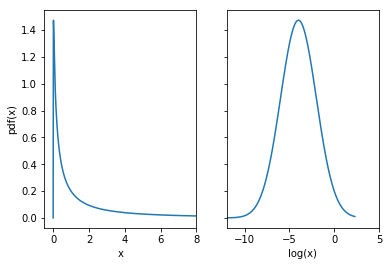

In [3]:
# Generate the data
x = np.logspace(-9,1,1001)+1e-9
lnd = stats.lognorm(2)
y = lnd.pdf(x)
# Generate 2 plots, side-by-side
fig, axs = plt.subplots(1,2, sharey=True)
# Left plot: linear scale on x-axis
axs[0].plot(x,y)
axs[0].set_xlim(-0.5,8)
axs[0].set_xlabel('x')
axs[0].set_ylabel('pdf(x)')

# Right plot: logarithmic scale on x-axis
axs[1].plot(np.log(x), y)
axs[1].set_xlim(-12,5)
axs[1].set_xlabel('log(x)')
plt.show()

Często normalność danych można poprawić przez zastosowanie odpowiedniej transformacji. Ogólną rodzinę transformacji, które często prowadzą do normalizacji danych można zapisać tak (http://www.jstor.org/stable/2984418?seq=1#page_scan_tab_contents):

$$
y^{(\lambda)}=\left\{\begin{matrix} \frac{y^\lambda-1} {\lambda} & \mbox{dla }\lambda \ne 0 \\ \ln(y) & \mbox{dla }\lambda = 0\end{matrix}\right.
$$

W module scipy.stats mamy tę transformację zaimplementowaną jako <tt> boxcox()</tt>.

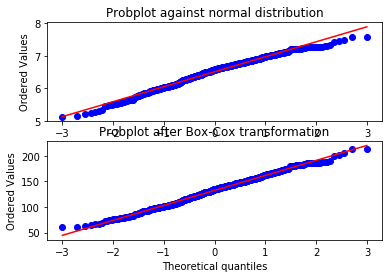

In [4]:

fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

# Zadanie
Pobierz dane z pliku https://github.com/przem85/statistics/blob/master/D7/ex_ad_2.txt oraz:
<ul>
<li> Narysuj histogram </li>
<li> Sprawdź metodami graficznymi i za pomocą wybranego testu czy dane pochodzą z rozkładu Normalnego </li>
<li> Wykonaj trasformatę Boxa-Coxa </li>
<li> Sprawdź metodami graficznymi i za pomocą wybranego testu czy dane po transformacji pochodzą z rozkładu Normalnego </li>
</ul>

In [12]:
import pandas as pd
ex_ad = pd.read_csv("ex_ad_2.txt", sep=' ', header=None)
w = ex_ad[1]
ex_ad.head()

,0,1
0,20.0,210000
1,25.0,175000
2,26.0,218000
3,27.0,230000
4,28.0,245000


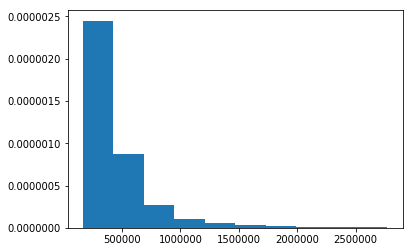

In [13]:
plt.hist(w, normed=True, histtype='stepfilled')
plt.show()

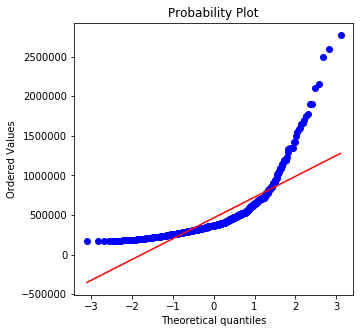

In [17]:
stats.probplot(w, plot=plt)
plt.show()

In [20]:
wt = stats.boxcox(w, lmbda=0)

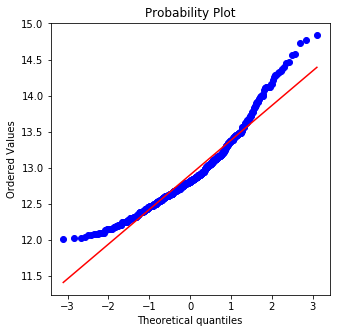

In [21]:
stats.probplot(wt, plot=plt)
plt.show()